In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.13033629 0.57157295 0.66563531 ... 0.24968886 0.41592353 0.61675987]
 [0.0578757  0.2538064  0.29557471 ... 0.11087409 0.18469043 0.27387161]
 [0.00249112 0.01092447 0.01272228 ... 0.0047723  0.00794954 0.01178812]
 ...
 [0.16548935 0.72573217 0.84516415 ... 0.31703257 0.52810247 0.78310648]
 [0.0376788  0.1652355  0.1924279  ... 0.07218232 0.12023895 0.17829854]
 [0.11511416 0.50481829 0.587895   ... 0.22052742 0.36734734 0.54472778]]

Noisy Matrix (with Homoscedastic Noise):
[[-0.07872051  0.47358259  0.73090904 ...  0.23881962  0.34695685
   0.56777361]
 [ 0.02808527  0.33921274  0.08220805 ...  0.23825871  0.15027581
   0.36644857]
 [ 0.03683727  0.0106748   0.03713854 ... -0.1145684   0.09753583
   0.15380304]
 ...
 [ 0.2520355   0.63094914  0.65186796 ...  0.33043756  0.57636547
   0.77195961]
 [-0.06208665  0.10060343  0.27488192 ... -0.01411589  0.34832338
   0.12056489]
 [ 0.07993299  0.70082444  0.70973164 ...  0.23207961  0.35663107
   0.57

In [2]:
print(u)

[7.07866183e-01 3.14327281e-01 1.35294379e-02 8.62588532e-01
 4.44280006e-01 4.51125206e-01 7.09345864e-01 9.89233643e-01
 2.51013402e-02 7.67348575e-01 4.87255245e-02 4.68296055e-02
 8.19406161e-01 8.84290143e-01 9.08696892e-01 6.16241171e-02
 9.50191218e-01 6.40531447e-01 6.84558186e-01 2.29006108e-01
 7.44172196e-02 3.84338429e-01 7.03257510e-01 4.46596267e-01
 6.56686861e-04 1.87084343e-01 1.26655708e-02 7.75996373e-02
 1.69562696e-01 7.45605259e-01 6.96730472e-01 4.74771016e-01
 4.55653761e-01 8.19714985e-02 9.32152709e-01 1.05551195e-01
 9.99768495e-01 4.28066370e-01 8.25074288e-01 7.55742993e-01
 3.59410875e-01 6.44178796e-01 5.63262522e-01 9.31897391e-03
 6.40118027e-01 3.60961431e-01 4.81136466e-01 8.98785124e-01
 2.04636382e-01 6.25193680e-01]


In [3]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [4]:
mycebmf= cEBMF(data    = noisy_matrix,
               prior_L = "exp",
               prior_F = "exp")
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

U, s, Vt = np.linalg.svd(mycebmf.data, full_matrices=False)
mycebmf.init_LF()
U
mycebmf.L
 

The array does not contain any missing values.


array([[ 2.75974175e+00, -2.07546975e-01,  2.74632997e-01,
        -2.46252886e-01, -6.98221878e-02],
       [ 1.19789118e+00,  3.00927892e-01, -1.27717646e-01,
        -1.68478341e-01, -1.38738030e-01],
       [ 1.12450460e-01, -5.04662184e-02, -9.47274162e-02,
         1.35847800e-01, -6.03532935e-02],
       [ 3.33054392e+00, -3.07299720e-01, -1.05740457e-03,
        -2.35030411e-01, -9.14862067e-02],
       [ 1.57923930e+00, -3.39226650e-02, -3.39355442e-02,
         1.26865228e-01,  7.57654709e-02],
       [ 1.88301251e+00, -2.67390398e-01, -2.40004906e-01,
         1.70142202e-01,  1.15132598e-01],
       [ 2.63719838e+00,  1.46627889e-01,  3.04179736e-01,
         3.34470504e-01, -1.15003400e-01],
       [ 3.84955887e+00,  1.49266367e-01,  3.18297378e-02,
        -3.13903898e-01, -1.41043494e-01],
       [ 4.02050387e-02,  2.79961357e-01, -3.34969965e-01,
         9.43054280e-02,  3.19360617e-02],
       [ 2.92883649e+00, -3.99745595e-02, -1.00543714e-01,
        -2.53856220e-01

In [5]:
mycebmf.iter()


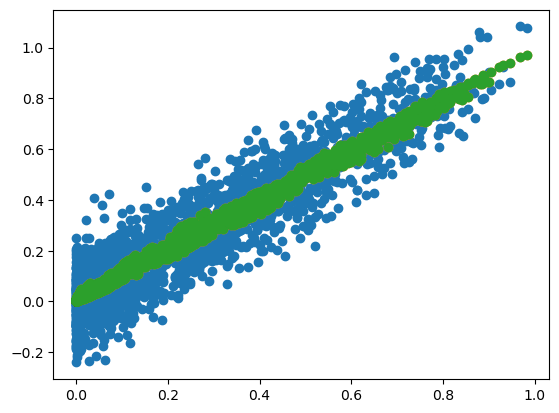

In [6]:
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [7]:
for i in range(20):
    mycebmf.iter()


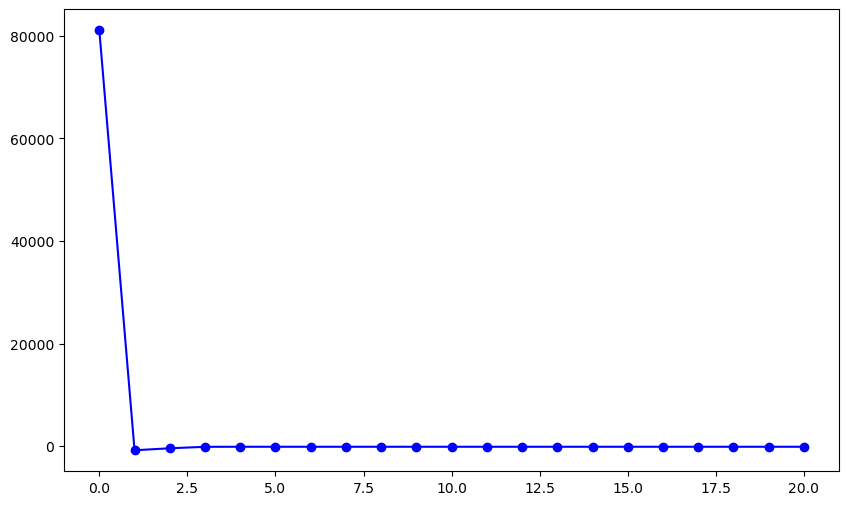

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

In [19]:
np.array(mycebmf.obj)[1:]

array([81088.67143744,  -824.66496127,  -433.51201582,  -148.82734586,
        -138.77095947,  -138.77028862,  -138.77026588,  -138.77026542,
        -138.77026527,  -138.77026519,  -138.77026516,  -138.77026514,
        -138.77026513,  -138.77026513,  -138.77026513,  -138.77026513,
        -138.77026513,  -138.77026513,  -138.77026513,  -138.77026513,
        -138.77026513])

[ 0.48349995  0.2095781   0.02007256  0.58454773  0.27685774  0.33090947
  0.46284035  0.67504198  0.00752047  0.5128902   0.01908236  0.04426253
  0.58360927  0.6042103   0.62051712  0.05413708  0.64402366  0.43610958
  0.45100904  0.15154876  0.02991686  0.24494716  0.48227029  0.33548468
 -0.00335676  0.09101517 -0.00812654  0.04588499  0.11752621  0.49209122
  0.49984505  0.3104234   0.29725317  0.04382672  0.63214909  0.06173021
  0.68600336  0.32413787  0.5605627   0.54621439  0.22747177  0.42765577
  0.374893   -0.02664825  0.41719824  0.19633126  0.32932245  0.61262032
  0.11445367  0.42260394]


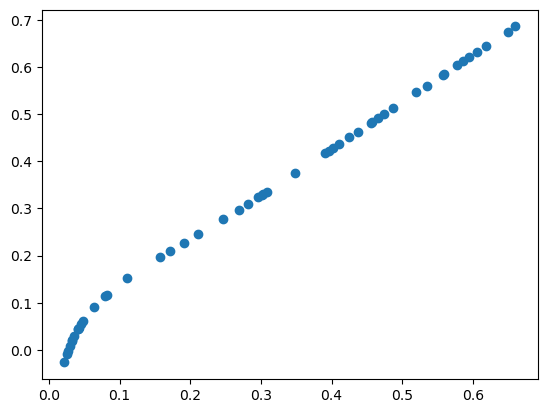

In [20]:
k=0
mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
 
print(lhat 
      )
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = mycebmf.prior_L,
                      verbose=False
                      )
 
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2

plt.scatter(ash_obj.post_mean, lhat)

In [21]:
normal_means_loglik(x=lhat , 
                                            s=  s_l,
                                            Et=ash_obj.post_mean,
                                            Et2= ash_obj.post_mean2
                                           )

-367.80446500954065

In [22]:
ash_obj.log_lik


-7.183623494330486

In [23]:
x=lhat

s=  s_l
Et=ash_obj.post_mean
Et2= ash_obj.post_mean2
print(Et2)
print(Et[12])
lhat[11] 




[0.45723991 0.17146248 0.03294039 0.55831804 0.24634757 0.30347728
 0.43656854 0.64883462 0.02941257 0.48664105 0.03264492 0.04119104
 0.55737935 0.57798556 0.59429645 0.04519469 0.61780876 0.40980929
 0.42472725 0.11089192 0.03605038 0.21112835 0.45600969 0.30819021
 0.02670972 0.06408834 0.02561839 0.04182161 0.08208057 0.46583483
 0.47359156 0.28217071 0.2682639  0.04102344 0.60593128 0.04855536
 0.65979863 0.29647347 0.53432686 0.51997476 0.19151691 0.40134057
 0.34830983 0.0218609  0.39085821 0.15682396 0.30183898 0.58639768
 0.07979324 0.39627776]
0.5573793453670645


0.04426253206548913

In [24]:
-0.5 * np.sum(np.log(2 * np.pi * s**2) + (1 / s**2) * (Et2 - 2 * x * Et + x**2))

-367.80446500954065

In [25]:
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = mycebmf.prior_L,
                      verbose=False
                      )
print(ash_obj.log_lik)


-7.183623494330486


In [26]:
ash_obj.pi

array([2.93660223e-01, 0.00000000e+00, 3.76346788e-18, 3.76346788e-18,
       3.76346788e-18, 3.76346788e-18, 3.76346788e-18, 3.76346788e-18,
       3.76346788e-18, 1.47490306e-14, 1.20792081e-07, 1.34345337e-02,
       6.85186874e-01, 7.71820311e-03, 4.54218736e-08, 5.72047118e-16])

In [28]:
betahat   =lhat
sebetahat =s_l 
prior     = mycebmf.prior_L
print(prior)

scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=np.sqrt(2))
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=True) 
print(optimal_pi)

exp
[2.93660223e-01 0.00000000e+00 3.76346788e-18 3.76346788e-18
 3.76346788e-18 3.76346788e-18 3.76346788e-18 3.76346788e-18
 3.76346788e-18 1.47490306e-14 1.20792081e-07 1.34345337e-02
 6.85186874e-01 7.71820311e-03 4.54218736e-08 5.72047118e-16]


[0.45723991 0.17146248 0.03294039 0.55831804 0.24634757 0.30347728
 0.43656854 0.64883462 0.02941257 0.48664105 0.03264492 0.04119104
 0.55737935 0.57798556 0.59429645 0.04519469 0.61780876 0.40980929
 0.42472725 0.11089192 0.03605038 0.21112835 0.45600969 0.30819021
 0.02670972 0.06408834 0.02561839 0.04182161 0.08208057 0.46583483
 0.47359156 0.28217071 0.2682639  0.04102344 0.60593128 0.04855536
 0.65979863 0.29647347 0.53432686 0.51997476 0.19151691 0.40134057
 0.34830983 0.0218609  0.39085821 0.15682396 0.30183898 0.58639768
 0.07979324 0.39627776]


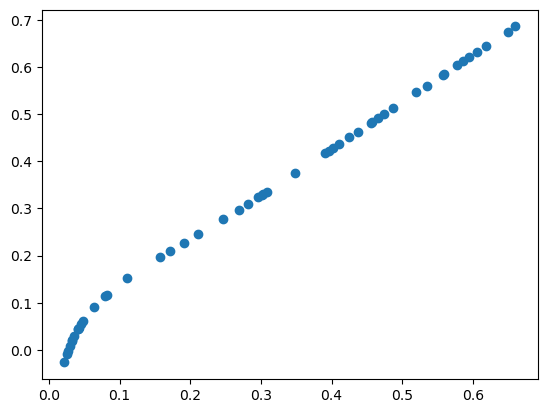

In [29]:
optimal_pi
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat= betahat ,
                        sebetahat=sebetahat ,
                                 log_pi=log_pi , 
                                 scale=scale)
plt.scatter(out.post_mean, lhat)
print(out.post_mean)